**RANDOM FOREST** is a form of ensemble learning where multiple decision trees learn patterns from a dataset together using ***bootstrapped datasets***, random features, and label sample(s) based on the aggregate decisions of the trees (referred to as **bagging**).

During bootstrapping, some samples in the training datasets will be left out-of-bag. These **out-of-bag-samples** are used by Random Forest to measure **accuracy**. Accuracy is measured by the proportion of out-of-bag samples that were correctly classified by the Random Forest.

Error therefore becomes the **out-of-bag error**, that is, the proportion of the out-of-bag samples that were incorrectly classified by Random Forest.

The incentive:

*   Random Forest offers the simplicity of decision trees with flexibility which result in better accuracy.
*   It improves generalization and reduces overfitting.
*   out-of-bag (OOB) error provides unbiased estimate so there is no need for separate validation set.



---

**Bootstrapping is a resampling technique where we perform repeatedly resampling with replacement from original dataset.*

---



Below is an example of a Random Forest model trained with the Wine dataset.

.
.
.


In [1]:
# import scikit-learn packages
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load wine dataset from sklearn.datasets
dataset = datasets.load_wine()
X = dataset.data # save the features in variable X
y = dataset.target # save the labels in variable y

# print some properties of the dataset
print(f"Features = {dataset.feature_names}")
print(f"Labels = {dataset.target_names}")
print(f"Number of features: {len(dataset.feature_names)}")
print(f"Dataset size: {len(y)}")

Features = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels = ['class_0' 'class_1' 'class_2']
Number of features: 13
Dataset size: 178


In [3]:
# split dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# create an instance of the classifier object
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [5]:
# train the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

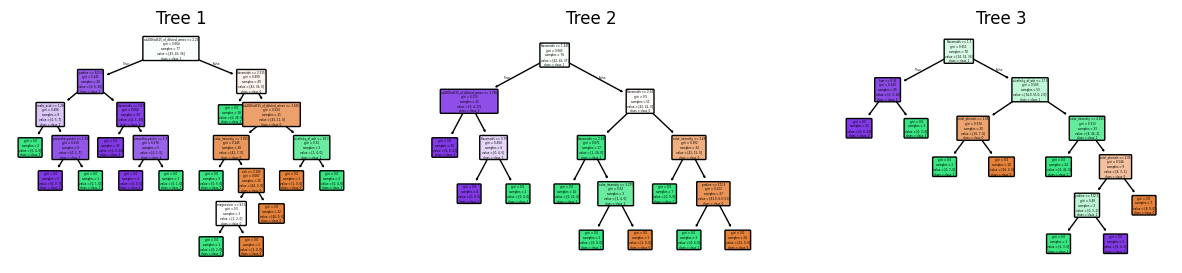

In [6]:
# plot the first 3 trees in the forest
fig, axes = plt.subplots(1, 3, figsize=(15,3))
for i, tree in enumerate(rf.estimators_[:3]):
  plot_tree(decision_tree=tree, feature_names=dataset.feature_names, class_names=dataset.target_names, filled=True, rounded=True, fontsize=2, ax=axes[i])
  axes[i].set_title(f"Tree {i+1}")
plt.show()

In [7]:
# predict the test data
y_pred = rf.predict(X_test)

# evaluate the performance of the model of the test data
accuracy = accuracy_score(y_test, y_pred)
error = mean_squared_error(y_test, y_pred)
print(f"Accuracy score: {accuracy*100:.1f}%")
print(f"Error: {error*100:.1f}%")

Accuracy score: 100.0%
Error: 0.0%


In some cases, ***the classifier might not have an accuracy of 100.0%***, it is fine! When this happens, fine tune the hyperparameters such as number of trees in the forest, the training data size, and so.on. Then select the model with the least error.